# `gslides` Advanced Usage

This notebook will walk you through more detailed usage of the package. While this notebook covers mostly all of the advanced features, for more comprehensive documentation checkout the [API Reference](https://michael-gracie.github.io/gslides/modules.html).

## Table of Contents

* [Initializing Credentials](#initializing_credentials)
* [Setup](#setup)
* [Styling Setup](#styling_setup)
* [Series Options](#series_options)
    * [Line](#series_options_line)
    * [Column](#series_options_column)
    * [Area](#series_options_area)
    * [Scatter](#series_options_scatter)
    * [Histogram](#series_options_histogram)
    * [Combo](#series_options_combo)
* [Chart Styling](#chart_styling)
    * [Data Labels](#data_labels)
    * [Size & Shape](#size_shape)
    * [Axis Formatting](#axis_formatting)
    * [Series Order](#series_order)
    * [Series Overrides](#series_overrides)
* [Layout](#layout)
* [Table](#table)
* [Ancillary_Features](#ancillary_features)
    * [Templating](#templating)
    * [Update Charts](#update_charts)

In [1]:
import os.path
from googleapiclient.discovery import build
from google_auth_oauthlib.flow import InstalledAppFlow
from google.auth.transport.requests import Request
from google.oauth2.credentials import Credentials

## Initializing Credentials <a class="anchor" id="initializing_credentials"></a>

This is the initialization using OAuth 2.0.

In [2]:
# If modifying these scopes, delete the file token.json.
SCOPES = ['https://www.googleapis.com/auth/presentations',
         'https://www.googleapis.com/auth/spreadsheets']

creds = None
# The file token.json stores the user's access and refresh tokens, and is
# created automatically when the authorization flow completes for the first
# time.
if os.path.exists('token.json'):
    creds = Credentials.from_authorized_user_file('token.json', SCOPES)
# If there are no (valid) credentials available, let the user log in.
if not creds or not creds.valid:
    if creds and creds.expired and creds.refresh_token:
        creds.refresh(Request())
    else:
        flow = InstalledAppFlow.from_client_secrets_file(
            '<PATH_TO_CREDS>', SCOPES)
        creds = flow.run_local_server()
    # Save the credentials for the next run
    with open('token.json', 'w') as token:
        token.write(creds.to_json())

## Setup <a class="anchor" id="setup"></a>

In [3]:
import gslides
from gslides import (
    Frame,
    Presentation,
    Spreadsheet,
    Table,
    Series, Chart
)
import pandas as pd
gslides.intialize_credentials(creds) #BringYourOwnCredentials

In [4]:
prs = Presentation.create(name = 'demo pres')

In [5]:
spr = Spreadsheet.create(
    title = 'demo spreadsheet',
    sheet_names = ['demo sheet']
)

In [6]:
df = pd.read_csv('time_series.csv')

In [7]:
df

,date,Ball,Chalk,Figurine
0,2018-01-01,10,15,13
1,2019-01-01,12,13,13
2,2020-01-01,14,11,13
3,2021-01-01,16,9,13


In [8]:
frame = Frame.create(df = df,
          spreadsheet_id = spr.spreadsheet_id,
          sheet_id = spr.sheet_names['demo sheet'],
          sheet_name = 'demo sheet',
          overwrite_data = True
)

## Styling Setup <a class="anchor" id="styling_setup"></a>

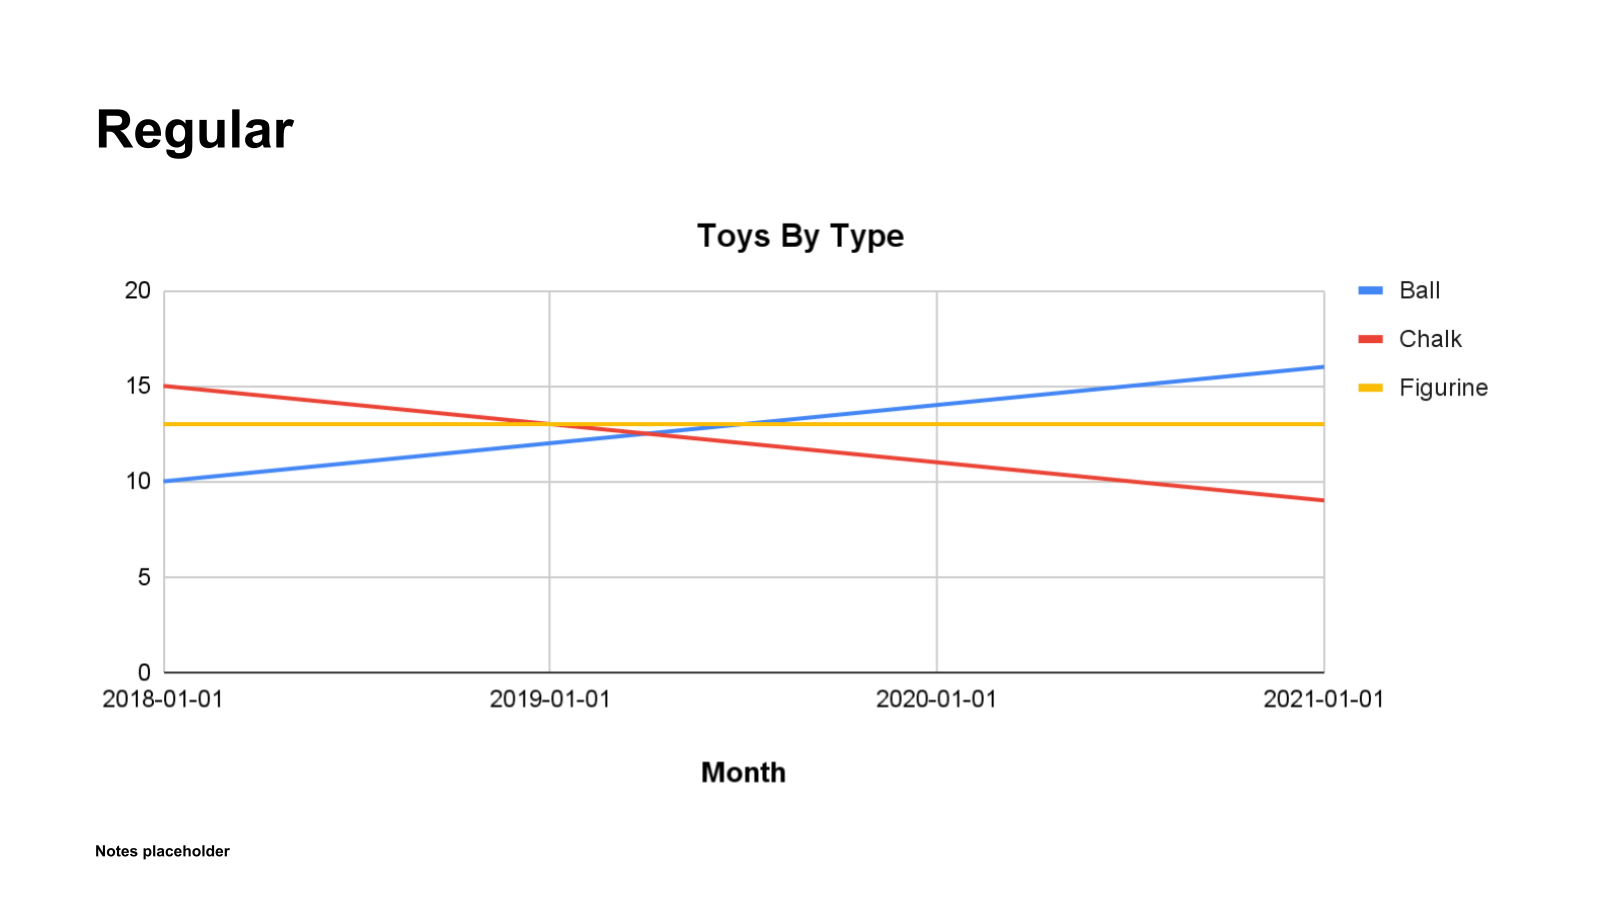

In [12]:
ch = Chart(
    data = frame.data,
    x_axis_column = 'date',
    series = [Series.line()],
    title = 'Toys By Type',
    x_axis_label = 'Month',
    legend_position = 'RIGHT_LEGEND',
    y_min = 0
)
prs.add_slide(
    objects = [ch],
    layout = (1,1),
    title = 'Regular'
)
prs.show_slide(prs.slide_ids[-1])

In [13]:
# Setting styling
gslides.set_font('Work Sans')
gslides.set_palette('prodigy')

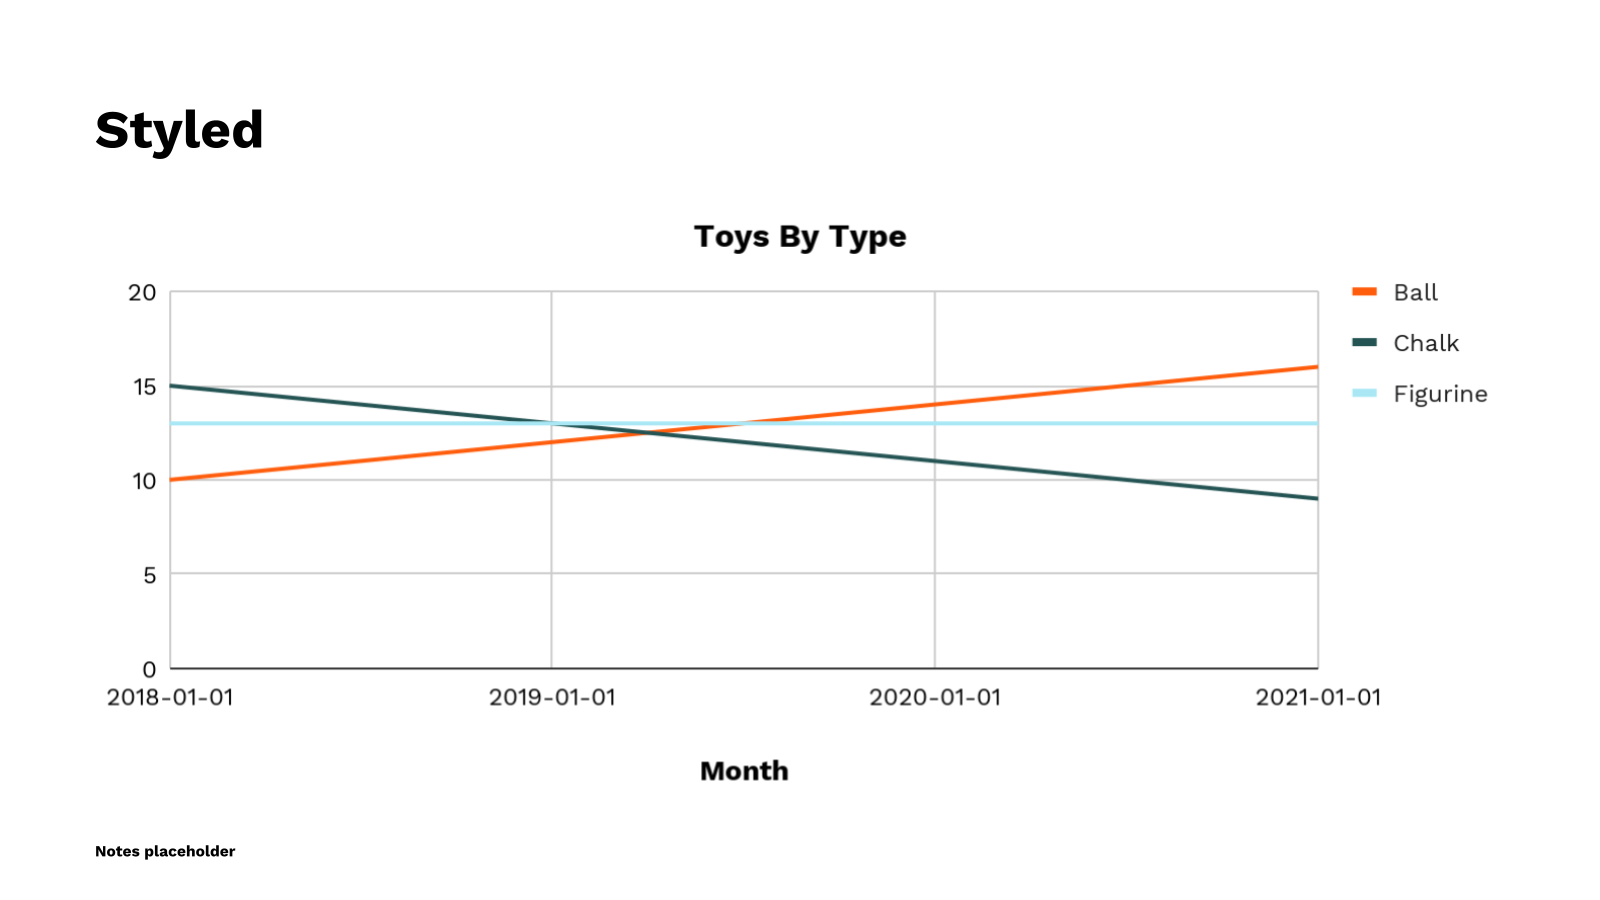

In [14]:
ch = Chart(
    data = frame.data,
    x_axis_column = 'date',
    series = [Series.line()],
    title = 'Toys By Type',
    x_axis_label = 'Month',
    legend_position = 'RIGHT_LEGEND',
    y_min = 0
)
prs.add_slide(
    objects = [ch],
    layout = (1,1),
    title = 'Styled'
)
prs.show_slide(prs.slide_ids[-1])

## Series Options <a class="anchor" id="series_options"></a>

There are 5 options for types of series

- Line
- Column
- Area
- Scatter
- Histogram

Each of these can be set through using the `Series.<type>` initialization method. 

There is the option to create a combo plot when you pass multiples series types in the `series` parameter of your `Chart` object.

### Line <a class="anchor" id="series_options_line"></a>

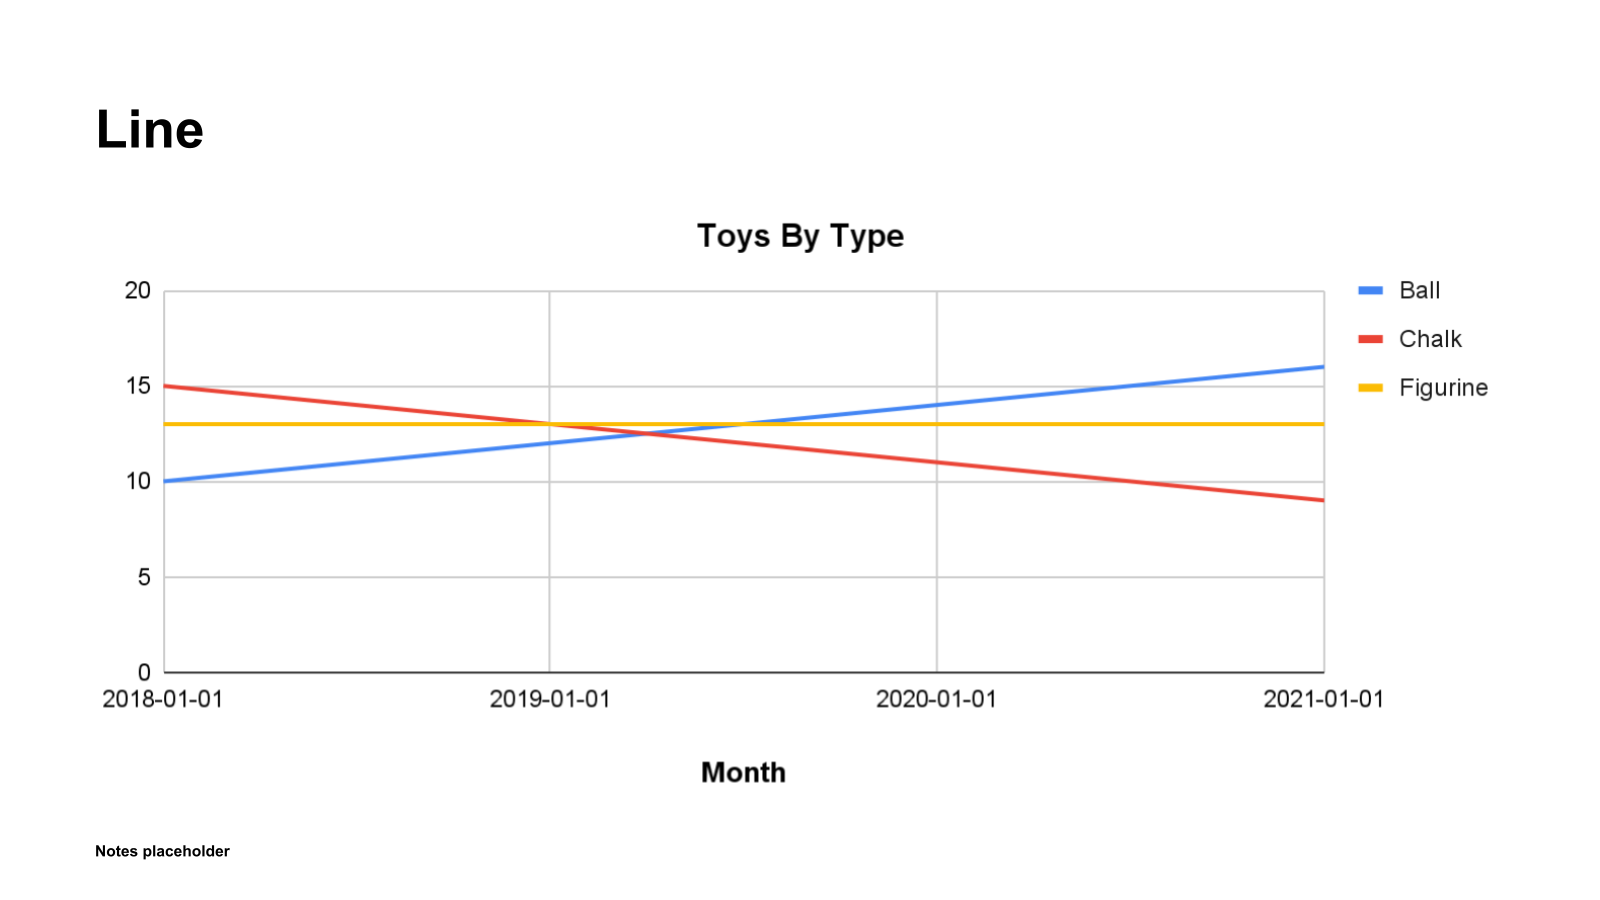

In [9]:
ch = Chart(
    data = frame.data,
    x_axis_column = 'date',
    series = [Series.line()], #by not specifying columns for your series the module simply take all non x-axis columns
    title = 'Toys By Type',
    x_axis_label = 'Month',
    legend_position = 'RIGHT_LEGEND',
    y_min = 0
)
prs.add_slide(
    objects = [ch],
    layout = (1,1),
    title = 'Line'
)
prs.show_slide(prs.slide_ids[-1])

### Column <a class="anchor" id="series_options_column"></a>

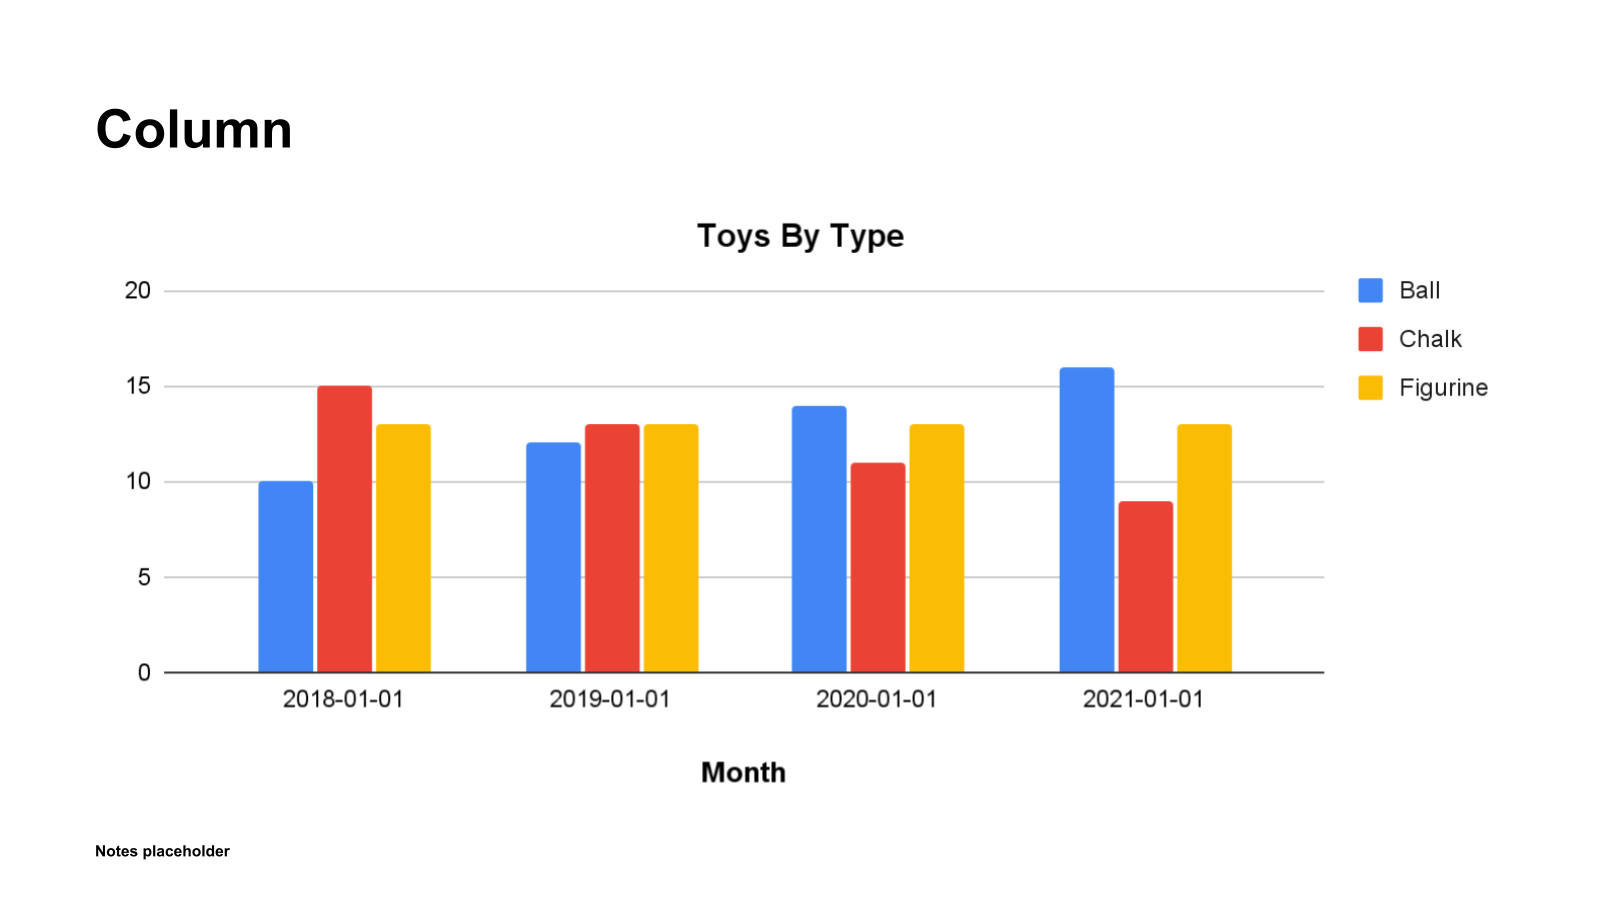

In [11]:
ch = Chart(
    data = frame.data,
    x_axis_column = 'date',
    series = [Series.column()],
    title = 'Toys By Type',
    x_axis_label = 'Month',
    legend_position = 'RIGHT_LEGEND',
    y_min = 0
)
prs.add_slide(
    objects = [ch],
    layout = (1,1),
    title = 'Column'
)
prs.show_slide(prs.slide_ids[-1])

#### Column Stacking <a class="anchor" id="stacking"></a>

Stacking can also be used for both `Column` and `Area` plots

In [12]:
ch_stacked = Chart(
    data = frame.data,
    x_axis_column = 'date',
    series = [Series.column()],
    title = 'Toys By Type',
    x_axis_label = 'Month',
    legend_position = 'RIGHT_LEGEND',
    y_min = 0,
    stacking = 'STACKED'
)

In [13]:
ch_percent = Chart(
    data = frame.data,
    x_axis_column = 'date',
    series = [Series.column()],
    title = 'Toys By Type',
    x_axis_label = 'Month',
    y_axis_label = '% of Total',
    legend_position = 'RIGHT_LEGEND',
    y_min = 0,
    y_max = 1,
    stacking = 'PERCENT_STACKED'
)

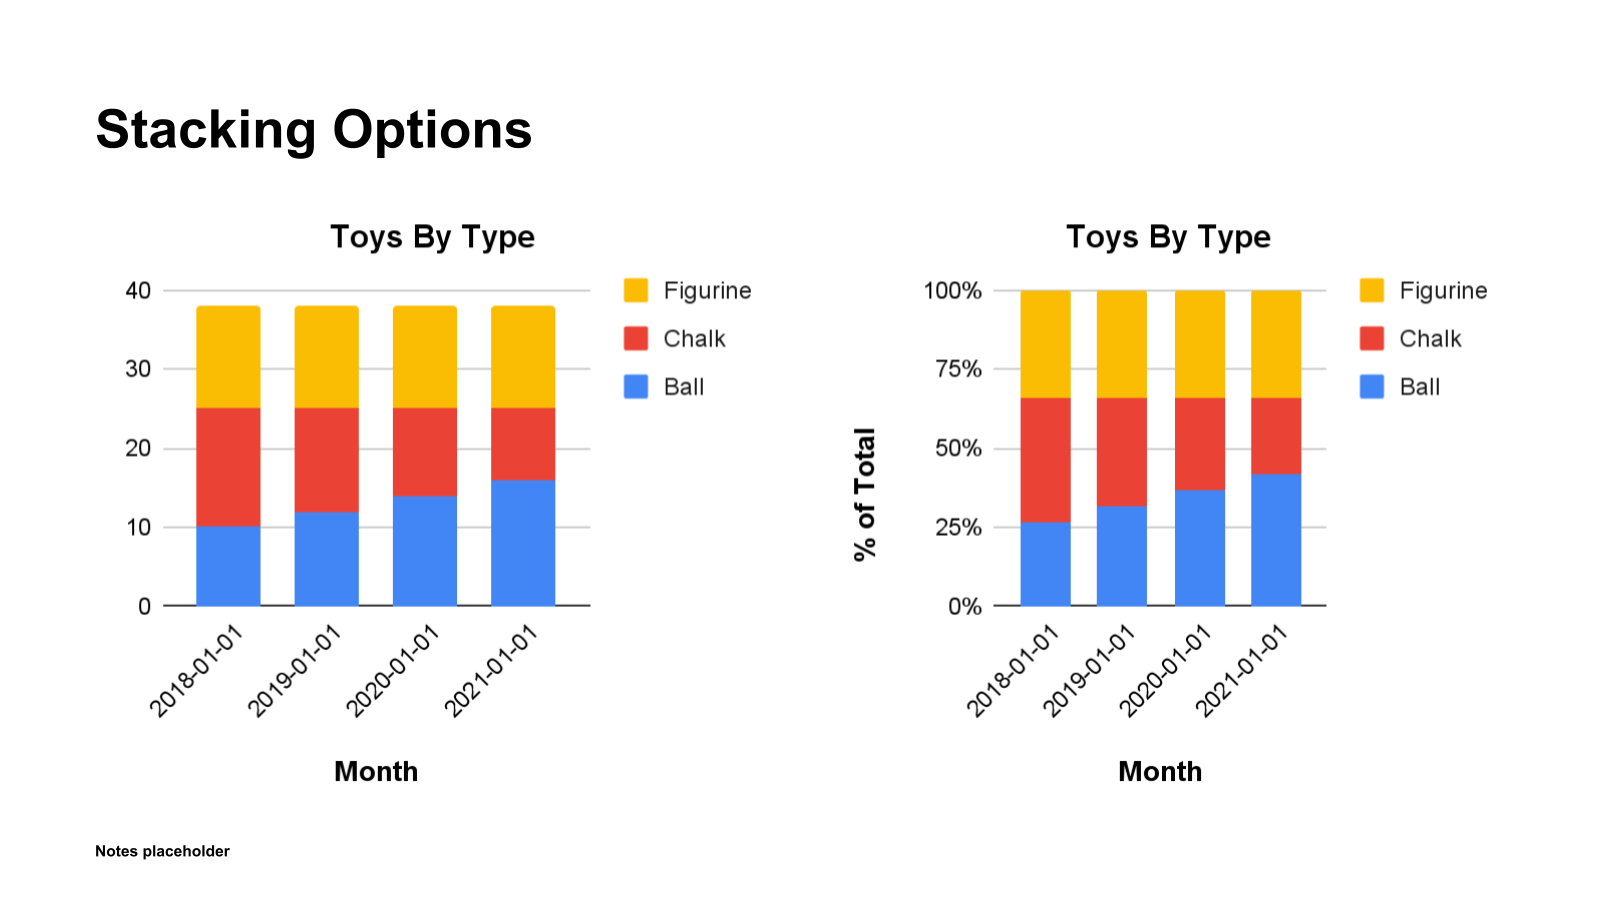

In [14]:
prs.add_slide(
    objects = [ch_stacked, ch_percent],
    layout = (1,2),
    title = 'Stacking Options'
)
prs.show_slide(prs.slide_ids[-1])

### Area <a class="anchor" id="series_options_area"></a>

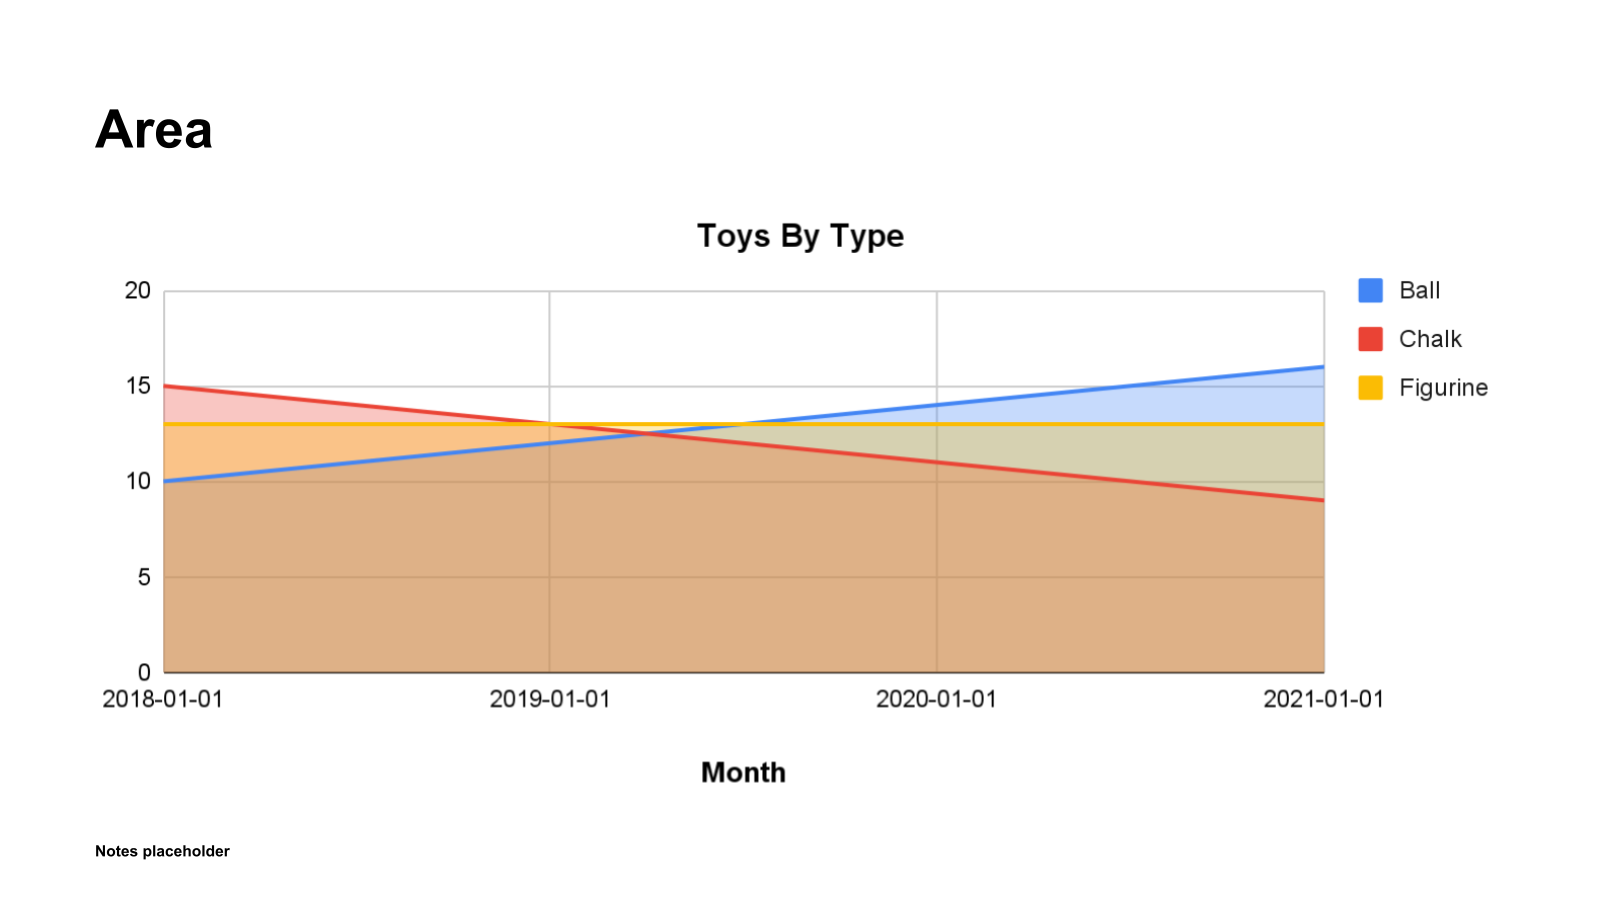

In [15]:
ch = Chart(
    data = frame.data,
    x_axis_column = 'date',
    series = [Series.area()],
    title = 'Toys By Type',
    x_axis_label = 'Month',
    legend_position = 'RIGHT_LEGEND',
    y_min = 0
)
prs.add_slide(
    objects = [ch],
    layout = (1,1),
    title = 'Area'
)
prs.show_slide(prs.slide_ids[-1])

### Scatter <a class="anchor" id="series_options_scatter"></a>

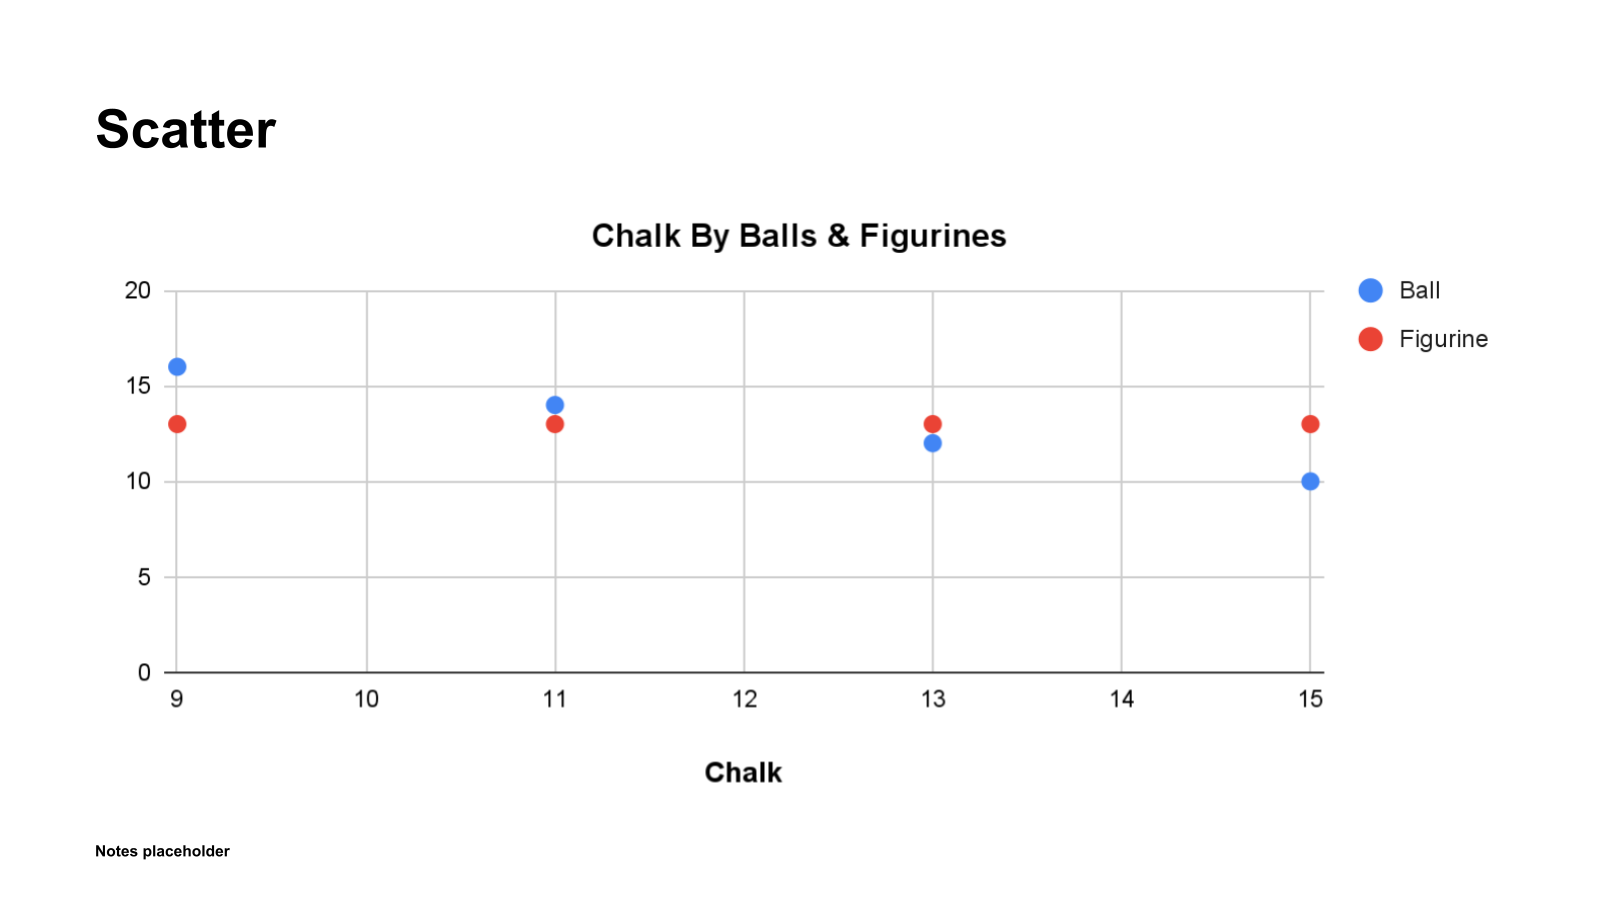

In [16]:
ch = Chart(
    data = frame.data,
    x_axis_column = 'Chalk',
    series = [Series.scatter(series_columns = ['Ball','Figurine'])],
    title = 'Chalk By Balls & Figurines',
    x_axis_label = 'Chalk',
    legend_position = 'RIGHT_LEGEND'
)
prs.add_slide(
    objects = [ch],
    layout = (1,1),
    title = 'Scatter'
)
prs.show_slide(prs.slide_ids[-1])

### Histogram <a class="anchor" id="series_options_histogram"></a>

Notice that the bucketing is done automatically to Google. You can specify `bucket_size` and `outlier_percentage` to configure the histogram.

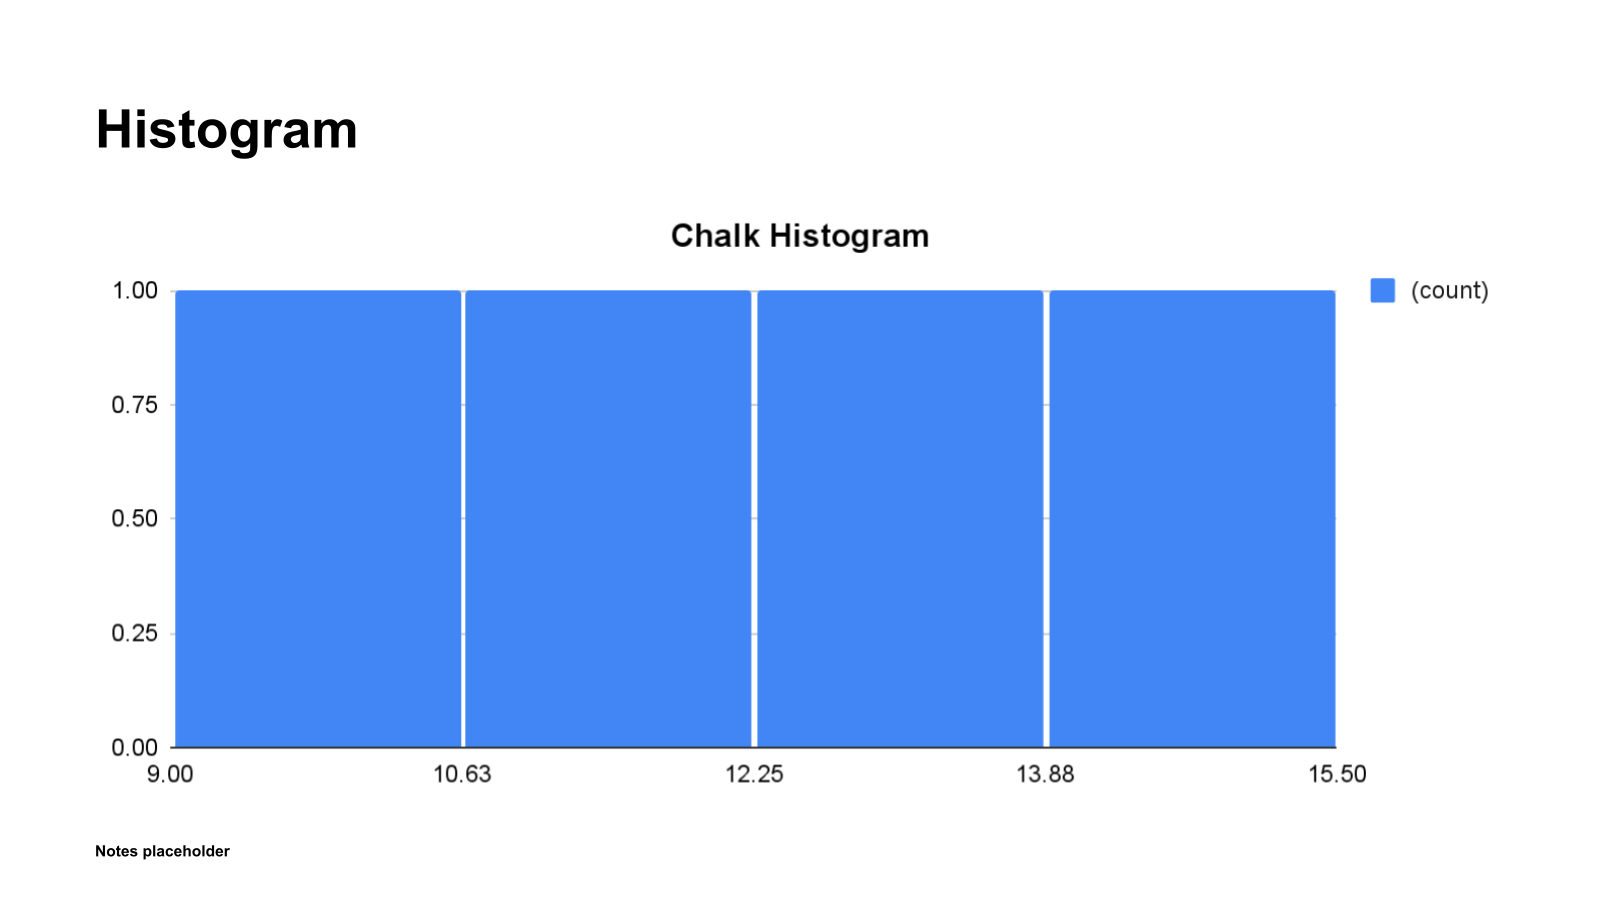

In [17]:
ch = Chart(
    data = frame.data,
    x_axis_column = 'Chalk',
    series = [Series.histogram(series_columns = ['Chalk'])],
    title = 'Chalk Histogram',
    legend_position = 'RIGHT_LEGEND'
)
prs.add_slide(
    objects = [ch],
    layout = (1,1),
    title = 'Histogram'
)
prs.show_slide(prs.slide_ids[-1])

### Combo <a class="anchor" id="series_options_combo"></a>

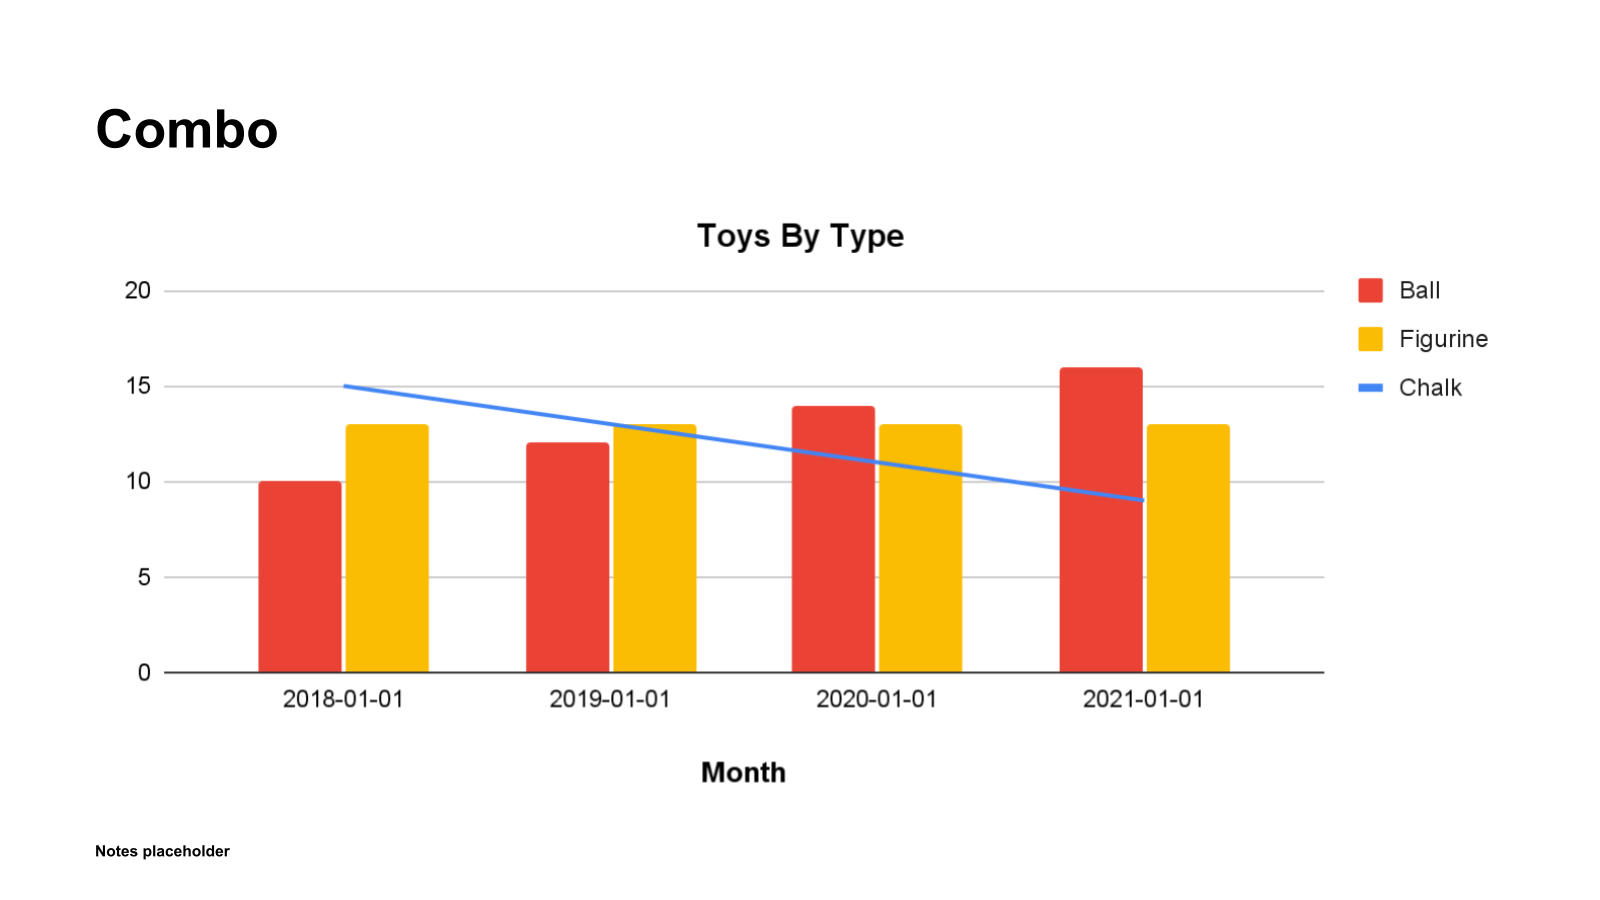

In [18]:
line = Series.line(series_columns = ['Chalk'])
column = Series.column(series_columns = ['Ball','Figurine'])
ch = Chart(
    data = frame.data,
    x_axis_column = 'date',
    series = [line, column],
    title = 'Toys By Type',
    x_axis_label = 'Month',
    legend_position = 'RIGHT_LEGEND',
    y_min = 0
)
prs.add_slide(
    objects = [ch],
    layout = (1,1),
    title = 'Combo'
)
prs.show_slide(prs.slide_ids[-1])

## Chart Styling <a class="anchor" id="chart_styling"></a>

### Data Labels <a class="anchor" id="data_labels"></a>

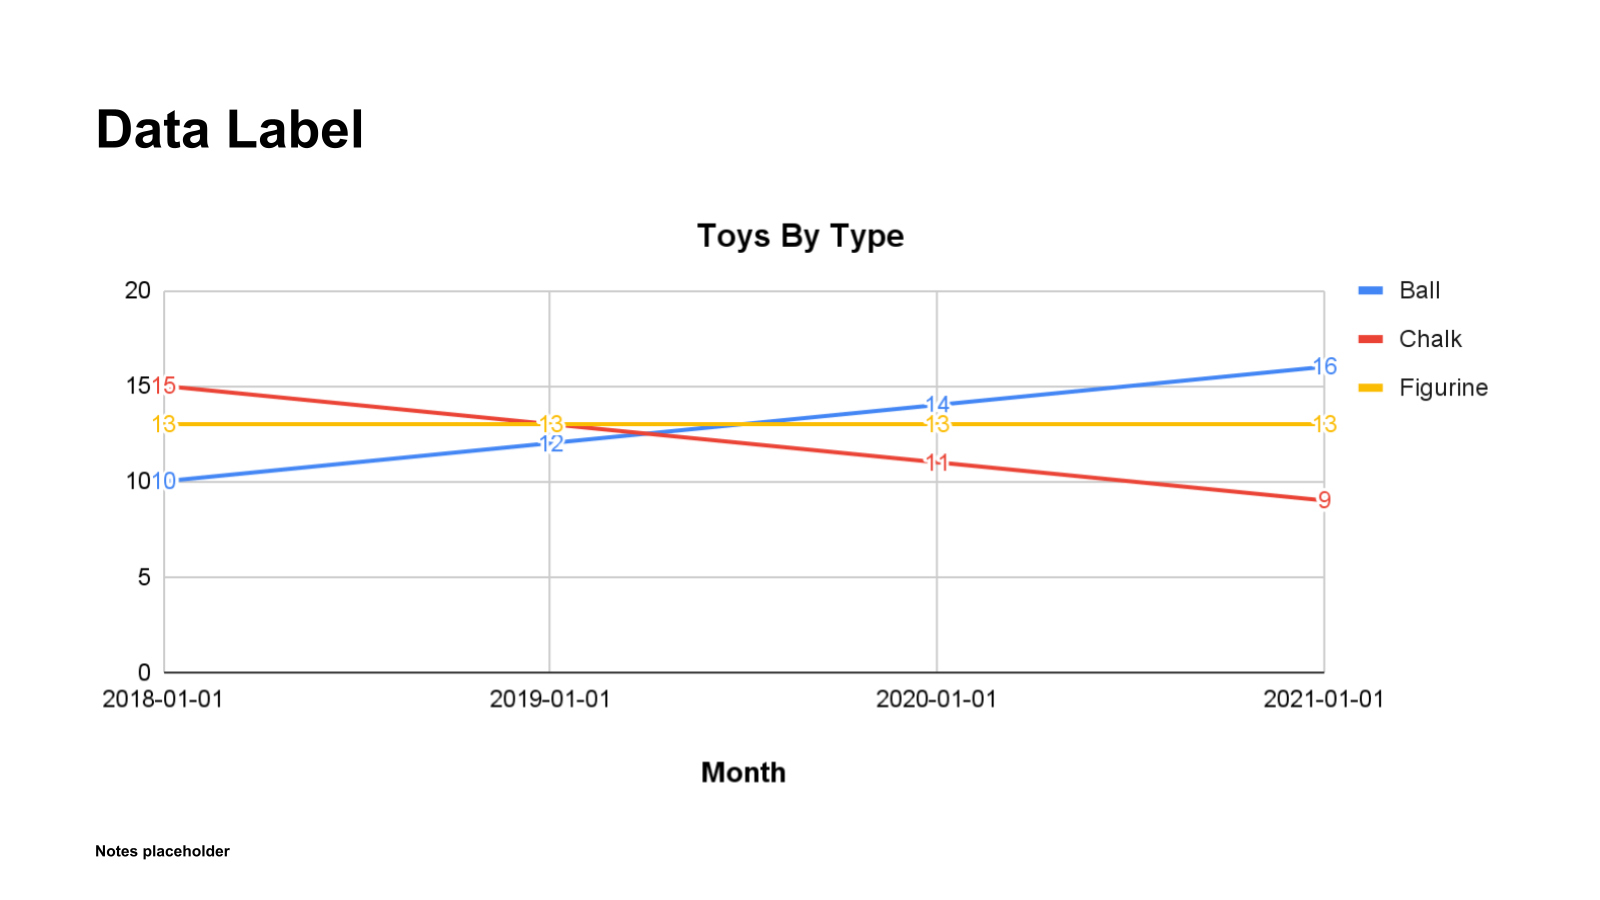

In [19]:
line = Series.line(
    data_label_enabled = True,
    data_label_placement = 'CENTER'
)
ch = Chart(
    data = frame.data,
    x_axis_column = 'date',
    series = [line],
    title = 'Toys By Type',
    x_axis_label = 'Month',
    legend_position = 'RIGHT_LEGEND',
    y_min = 0,
)
prs.add_slide(
    objects = [ch],
    layout = (1,1),
    title = 'Data Label'
)
prs.show_slide(prs.slide_ids[-1])

### Size & Shape <a class="anchor" id="size_shape"></a>

Depending on the plot type is possible to change the size of the line, point and the shape/ formatting of the line / point

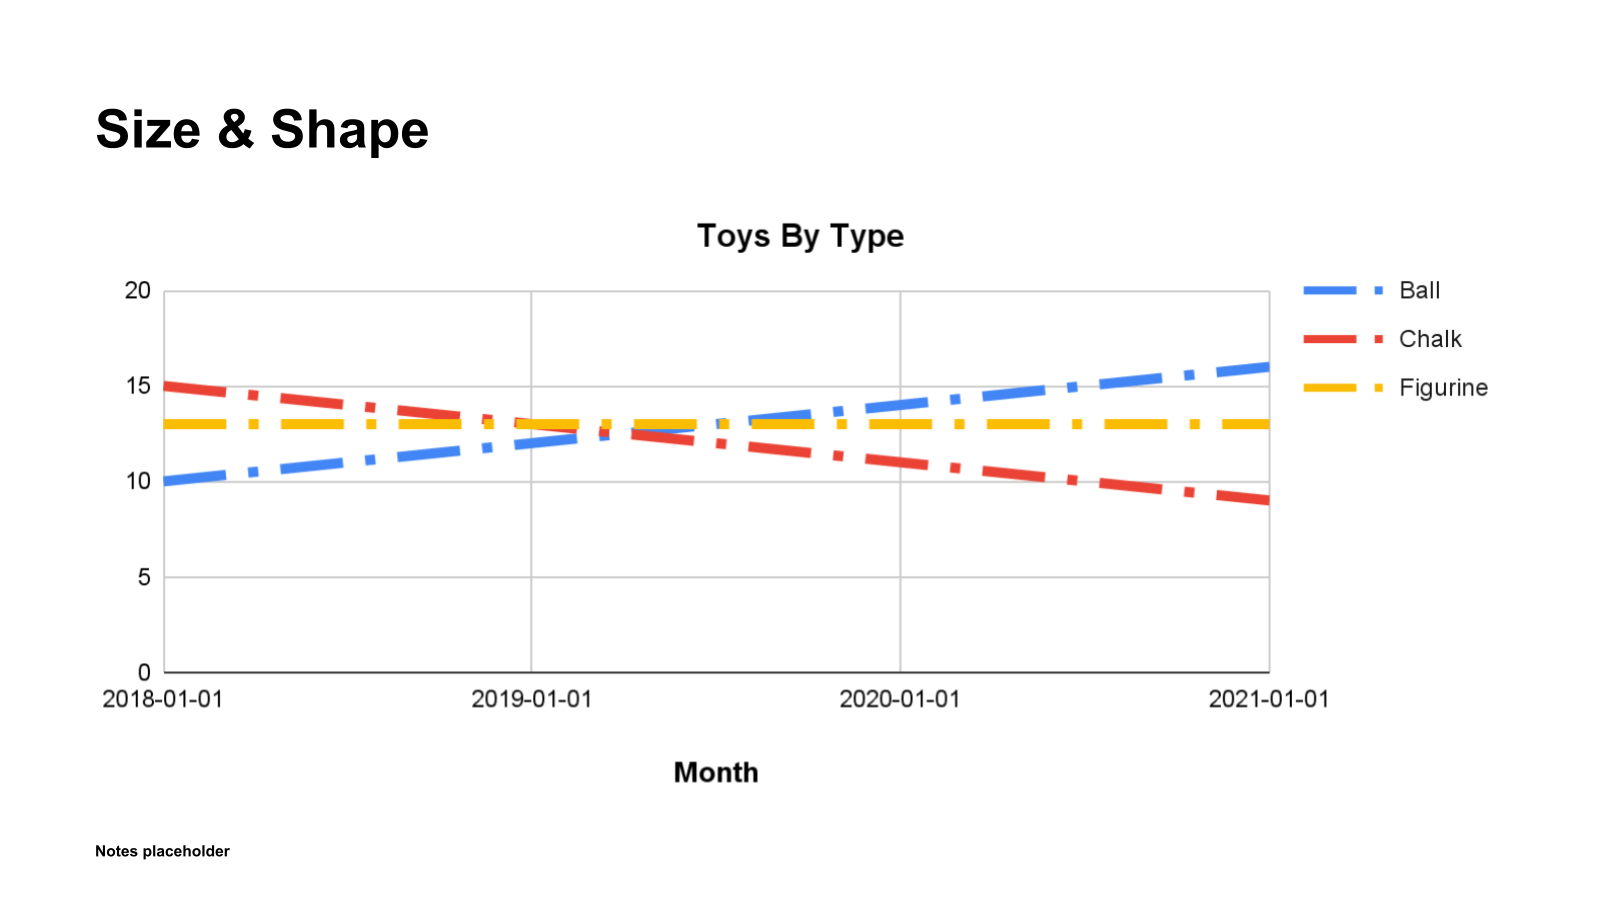

In [20]:
line = Series.line(
    line_style = 'LONG_DASHED_DOTTED',
    line_width = 5
)
ch = Chart(
    data = frame.data,
    x_axis_column = 'date',
    series = [line],
    title = 'Toys By Type',
    x_axis_label = 'Month',
    legend_position = 'RIGHT_LEGEND',
    y_min = 0,
)
prs.add_slide(
    objects = [ch],
    layout = (1,1),
    title = 'Size & Shape'
)
prs.show_slide(prs.slide_ids[-1])

### Axis Formatting <a class="anchor" id="axis_formatting"></a>

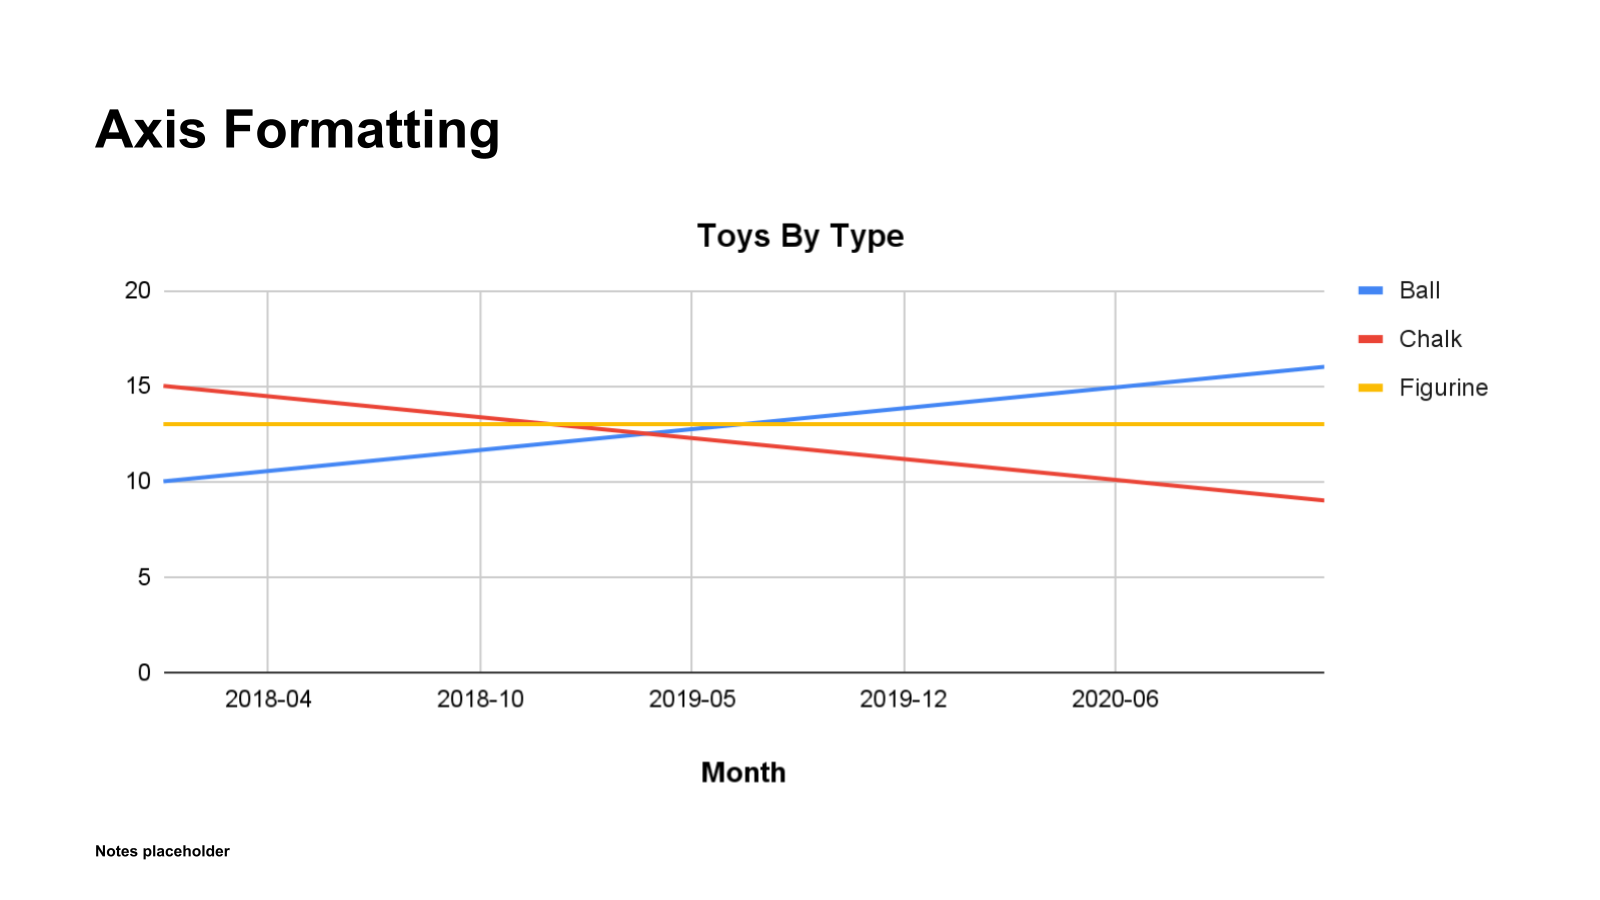

In [21]:
ch = Chart(
    data = frame.data,
    x_axis_column = 'date',
    series = [Series.line()],
    title = 'Toys By Type',
    x_axis_label = 'Month',
    legend_position = 'RIGHT_LEGEND',
    y_min = 0,
    x_axis_format = 'YYYY-MM'
)
prs.add_slide(
    objects = [ch],
    layout = (1,1),
    title = 'Axis Formatting'
)
prs.show_slide(prs.slide_ids[-1])

### Series Order <a class="anchor" id="series_order"></a>

You can set the order of your series by passing a list to the `series_columns` parameter

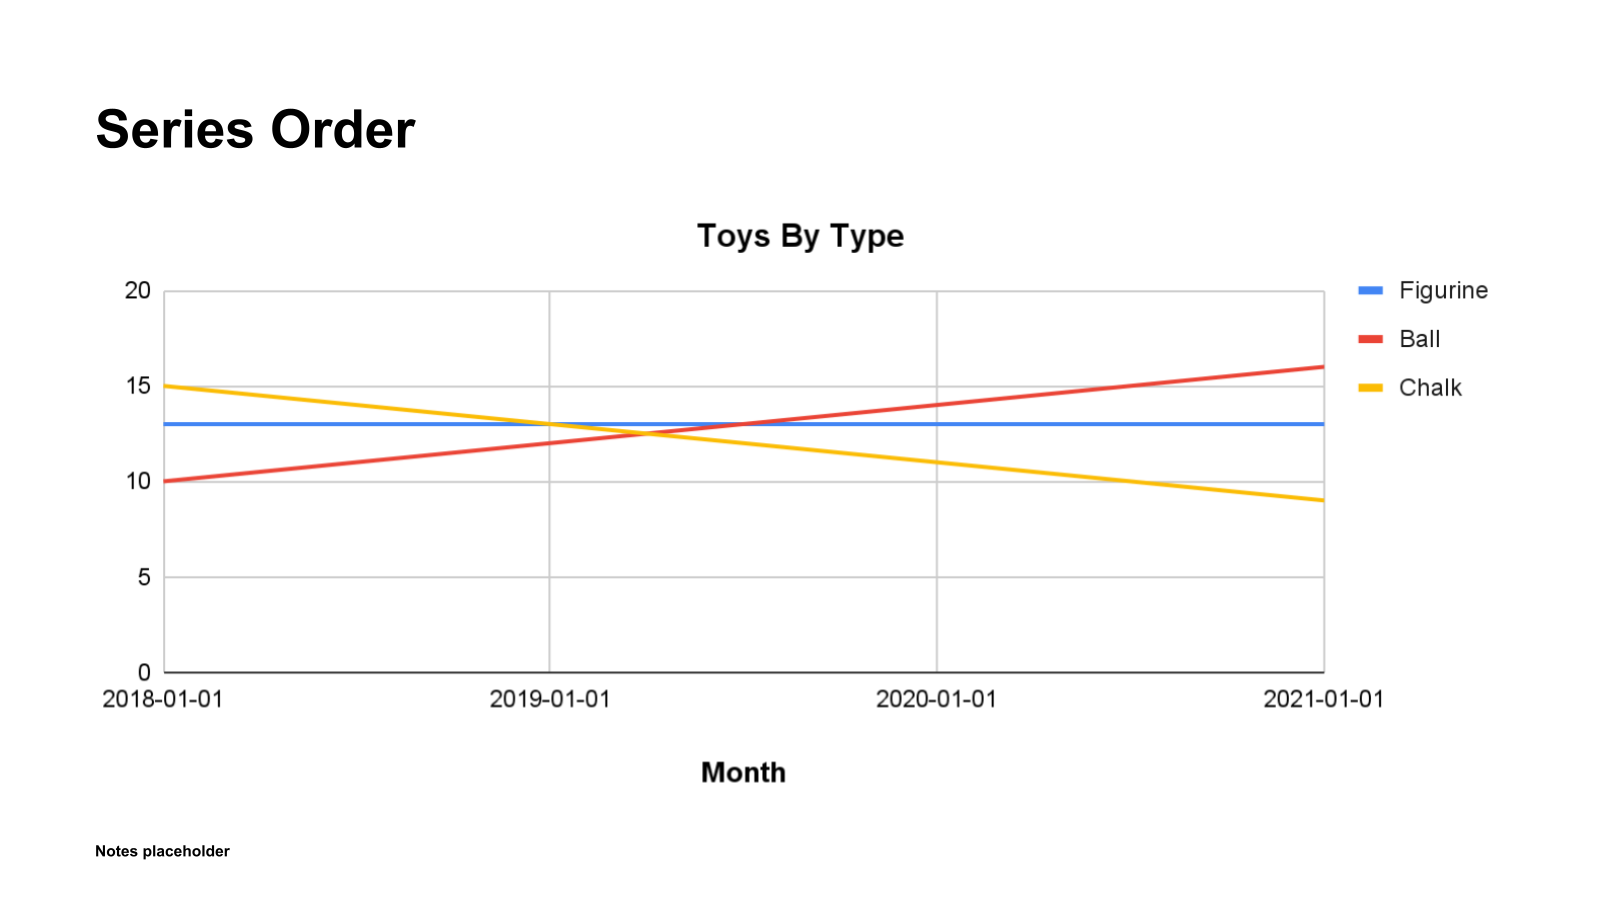

In [22]:
ch = Chart(
    data = frame.data,
    x_axis_column = 'date',
    series = [Series.line(series_columns = ['Figurine', 'Ball', 'Chalk'])],
    title = 'Toys By Type',
    x_axis_label = 'Month',
    legend_position = 'RIGHT_LEGEND',
    y_min = 0,
)
prs.add_slide(
    objects = [ch],
    layout = (1,1),
    title = 'Series Order'
)
prs.show_slide(prs.slide_ids[-1])

### Series overrides <a class="anchor" id="series_overrides"></a>

By passing multiple series objects in the `series` parameter you can override any previous configuration for a column in a subsequent `Series` object. The example below overrides column, however you can override and series parameter you wish.

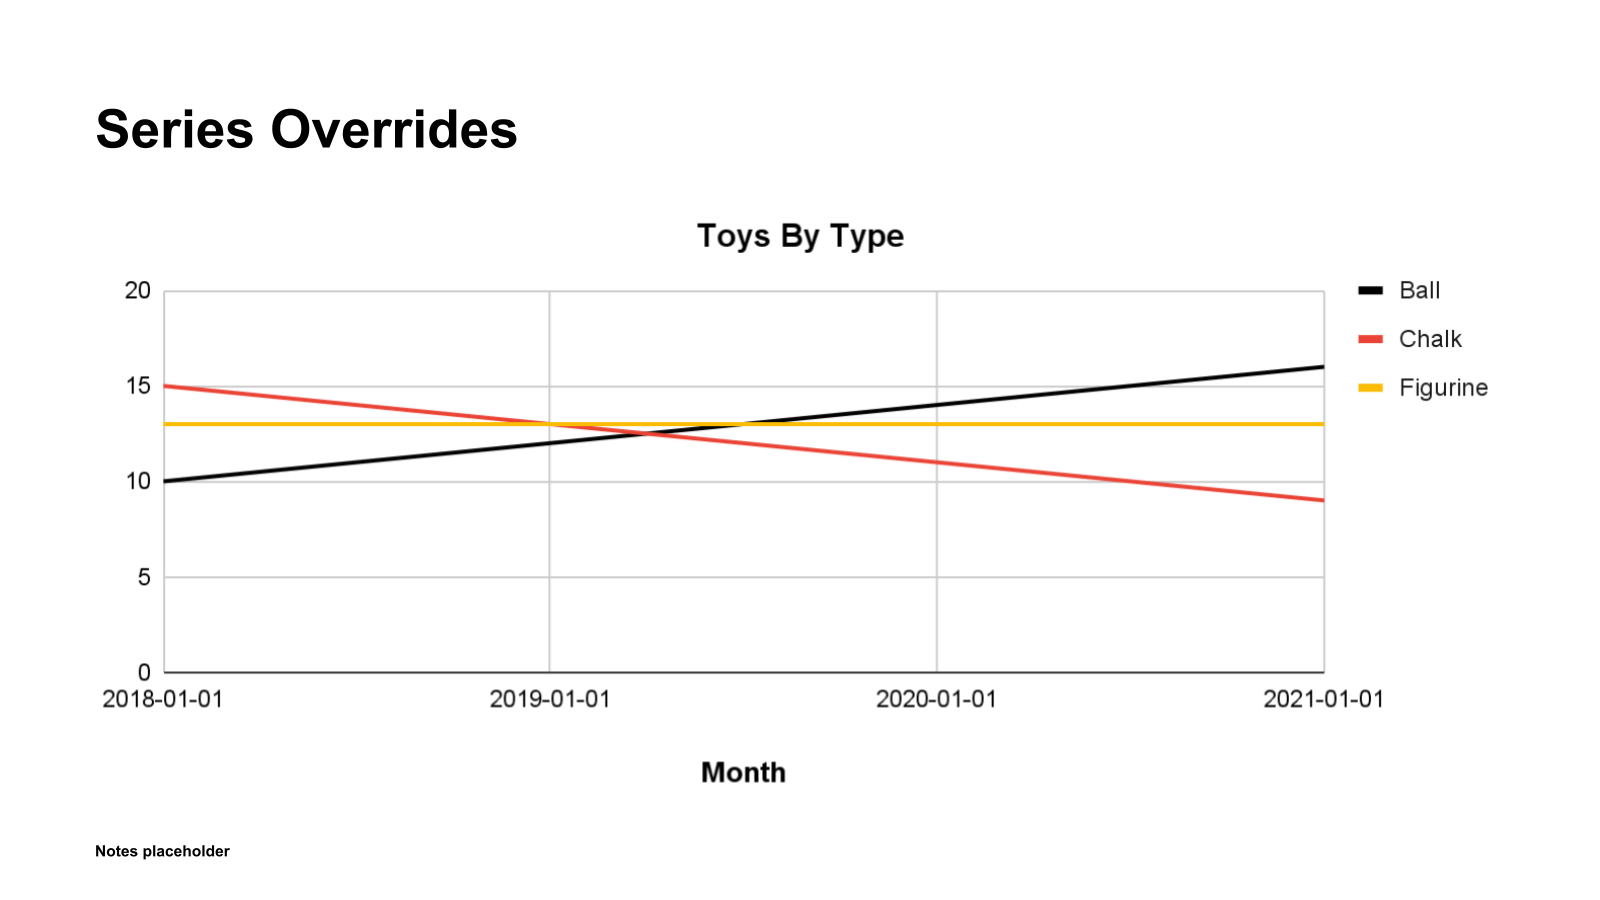

In [23]:
line = Series.line() # regular palette for all columns
override = Series.line(series_columns = ['Ball'], color = 'black') # setting the ball line to black
ch = Chart(
    data = frame.data,
    x_axis_column = 'date',
    series = [line, override],
    title = 'Toys By Type',
    x_axis_label = 'Month',
    legend_position = 'RIGHT_LEGEND',
    y_min = 0,
)
prs.add_slide(
    objects = [ch],
    layout = (1,1),
    title = 'Series Overrides'
)
prs.show_slide(prs.slide_ids[-1])

## Layout <a class="anchor" id="layout"></a>

The layout charts on a slides the user simply needs to pass the numbers of rows and column in the `layout` parameter and the package will place the charts on a grid from left to right. The example below illustrates this:

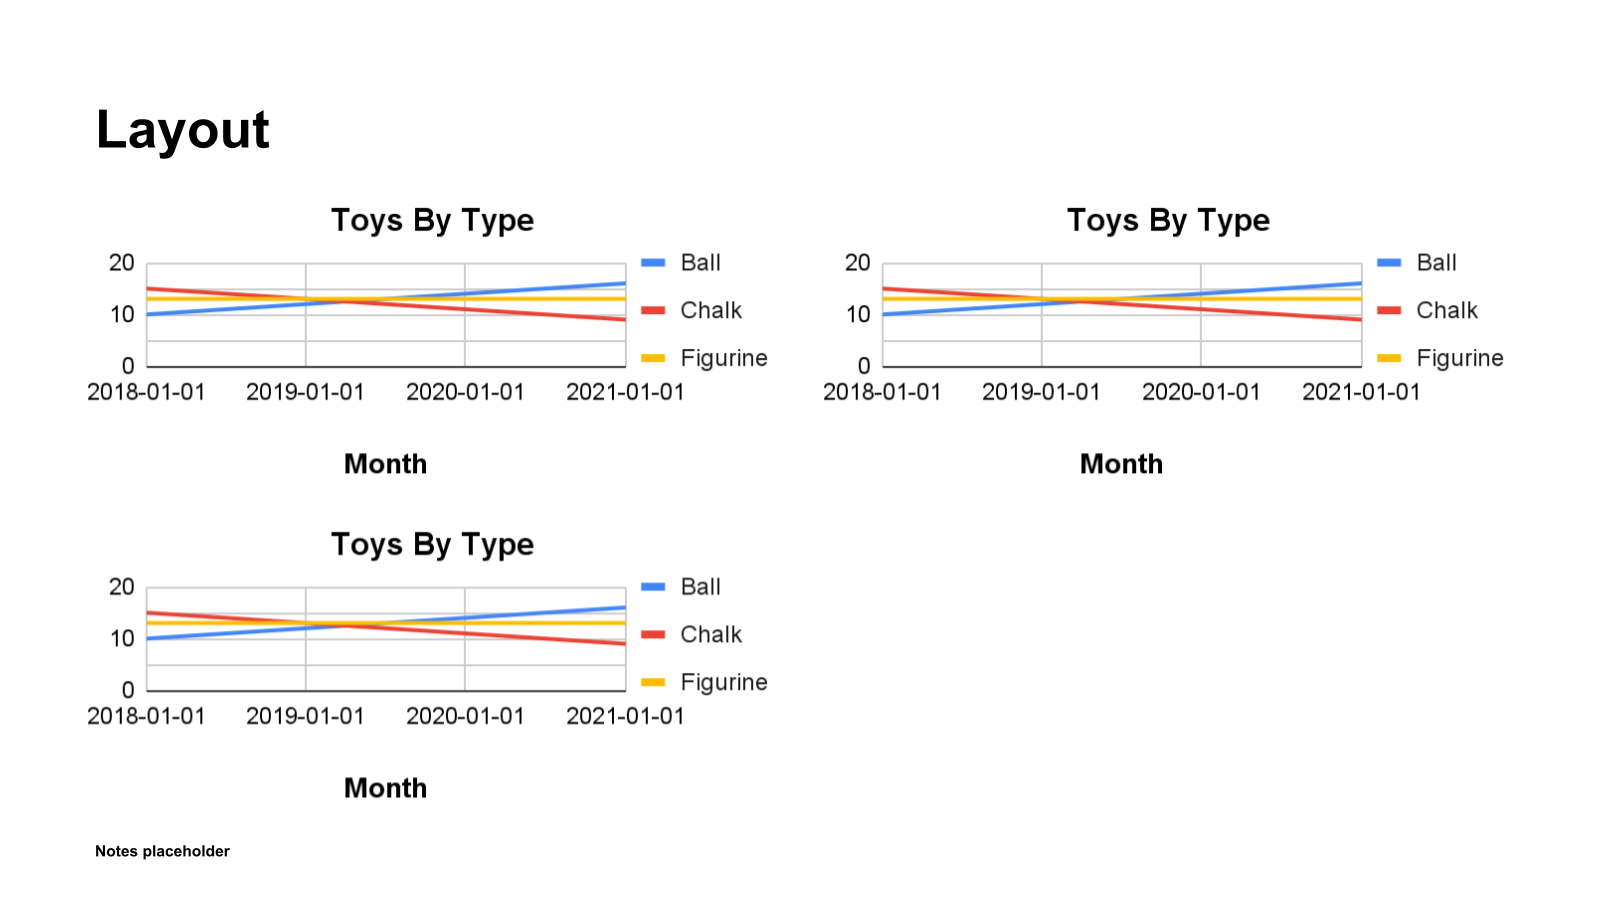

In [24]:
charts = []
for i in range(3):
    ch = Chart(
        data = frame.data,
        x_axis_column = 'date',
        series = [Series.line()], 
        title = 'Toys By Type',
        x_axis_label = 'Month',
        legend_position = 'RIGHT_LEGEND',
        y_min = 0
    )
    charts.append(ch)
prs.add_slide(
    objects = charts,
    layout = (2,2),
    title = 'Layout'
)
prs.show_slide(prs.slide_ids[-1])

## Table <a class="anchor" id="table"></a>

The table class is quite simple, with a couple of custom configurations.

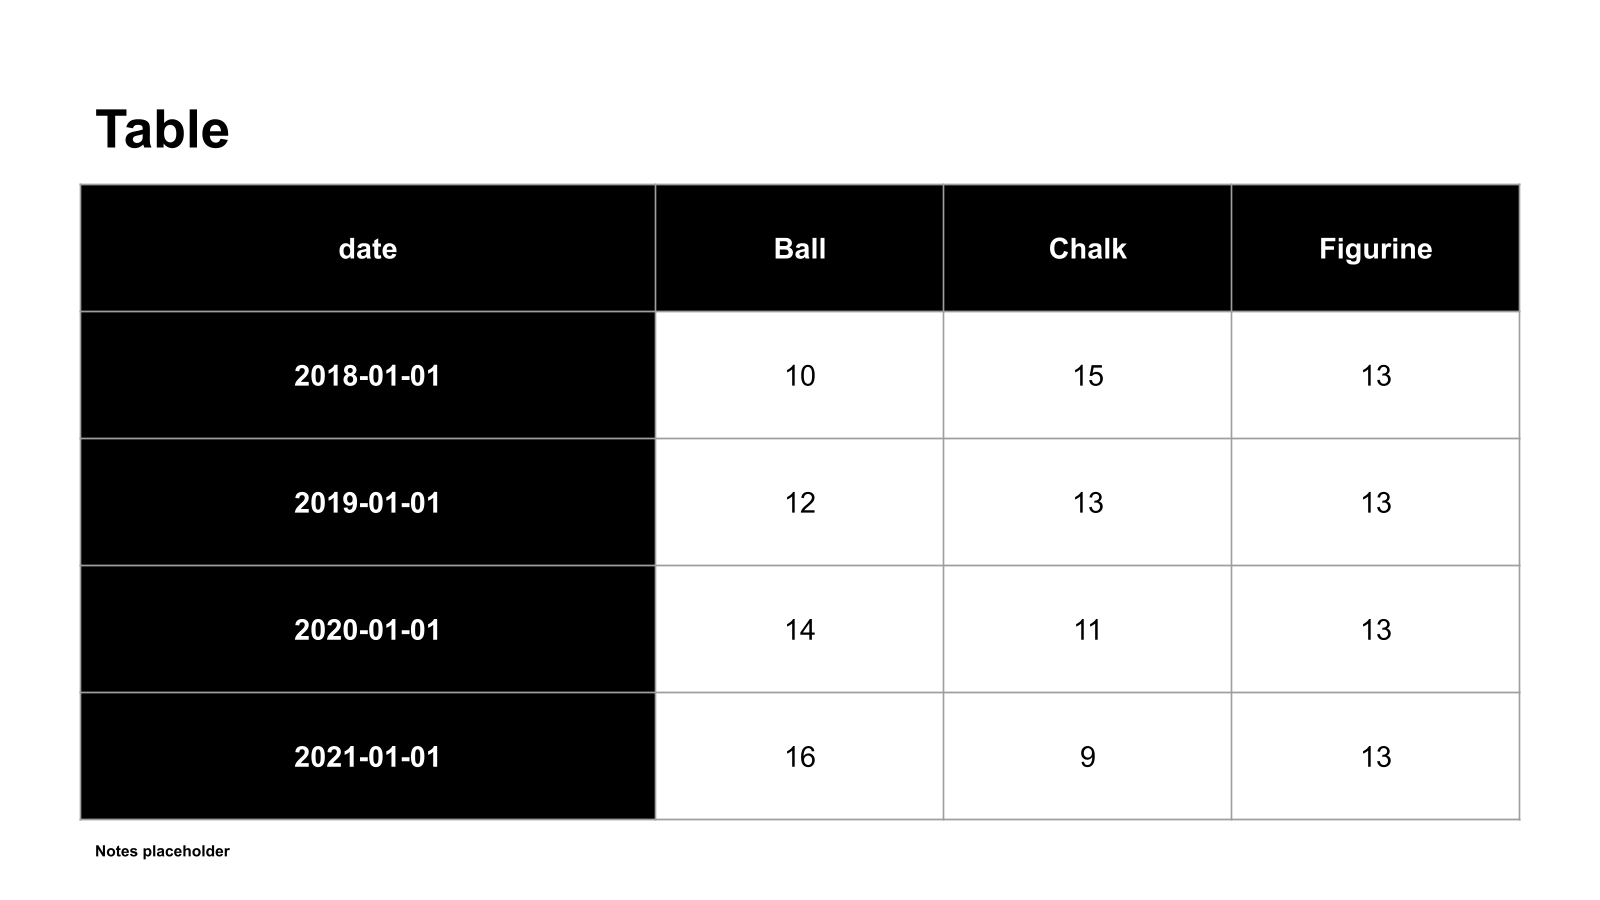

In [25]:
tbl = Table(
    data = df,
    header = True,                            # header row enabled
    stub = True,                              # stub (first) column enabled
    header_background_color = "black",        # color set
    stub_background_color= "black",           # color set
    font_size = 13,                           # custom font size
    column_proportions = [0.4, 0.2, 0.2, 0.2] # this is automatically calculated unless set
)
prs.add_slide(
    objects = [tbl],
    layout = (1,1),
    title = 'Table'
)
prs.show_slide(prs.slide_ids[-1])

## Ancillary Features <a class="anchor" id="ancillary_features"></a>

### Templating <a class="anchor" id="templating"></a>

The `template()` method allows the user to template data into a given presentation. In your presentation create a placeholder for the text that you wish to be templated like so `{{ template_var }}`. Pass a dictionary into the `template()` method with the key `template_var` and value for the text that you would like to inject. The function will replace all instances of that `template_var` with text in the presentation.

In [ ]:
prs.template(mapping = {'hello': 'world'})

### Update Charts <a class="anchor" id="update_charts"></a>

When you modify a chart in google sheets with additional data or update the styling the linked chart in a google slide deck will not update automatically. The ``update_charts()`` method finds all charts in a given presentation and updates them to match the google sheets version. This method is useful if you have an existing chart in a presentation and want to update the data but not recreate the chart. You can update the data in Google Sheets with the ``Frame`` object and then run the ``update_charts()`` method to reflect the new data in your existing chart.

In [ ]:
prs.update_charts()